In [34]:
!pip3 install pyocto pyarrow

  Could not find a version that satisfies the requirement pyocto (from versions: )
No matching distribution found for pyocto


In [402]:
import pyocto
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from collections import Counter

## Input Data

In [450]:
picks = pd.read_csv("~/notebooks/data/phase_association/picks_first_half")
stations = pd.read_csv("~/notebooks/data/phase_association/stations_first_half")

In [451]:
picks

,Unnamed: 0,station,phase,time
0,0,FS09B,P,2012-10-01T00:04:09.141700Z
1,1,FS09B,P,2012-10-01T00:36:41.601700Z
2,2,FS09B,P,2012-10-01T00:55:43.061700Z
3,3,FS09B,P,2012-10-01T01:16:07.681700Z
4,4,FS09B,P,2012-10-01T01:41:37.561700Z
...,...,...,...,...
1219,1219,G25B,P,2012-10-14T04:50:49.077500Z
1220,1220,G25B,P,2012-10-14T04:51:20.781500Z
1221,1221,G25B,P,2012-10-14T04:56:46.781500Z
1222,1222,G25B,P,2012-10-14T04:58:18.253500Z


  ## Velocoty Models

In [452]:
velocity_model = pyocto.VelocityModel0D(
    p_velocity=7.0,
    s_velocity=4.0,
    tolerance=2.0,
)

## The OctoAssociator class

In [453]:
associator = pyocto.OctoAssociator.from_area(
    lat=(40, 43.5),
    lon=(-126.5, -123),
    zlim=(300, 4000),
    time_before=300,
    velocity_model=velocity_model,
    n_picks=2,
    n_p_picks=1,
    n_s_picks=1,
    n_p_and_s_picks=1,
)

In [454]:
associator.crs

<Projected CRS: +proj=tmerc +lat_0=41.75 +lon_0=-124.75 +units=km  ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [455]:
associator.transform_stations(stations)
stations

,Unnamed: 0,id,longitude,latitude,elevation,x,y,z
0,0,FS09B,-124.808502,40.438702,-2161.0,-4.963595,-145.625525,2.161
1,1,FS13B,-124.806503,40.493099,-2332.0,-4.790124,-139.585196,2.332
2,2,G10B,-125.553299,40.677898,-2936.0,-67.913996,-118.755232,2.936
3,3,G19B,-125.773598,41.307400,-3071.0,-85.719842,-48.651523,3.071
4,4,G25B,-124.586098,41.919899,-430.0,13.596424,18.883688,0.430


## Convert the timestamps to floats

In [456]:
picks["time"] = picks["time"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

In [457]:
picks["time"] = picks["time"].apply(lambda x: x.timestamp())
picks

,Unnamed: 0,station,phase,time
0,0,FS09B,P,1.349050e+09
1,1,FS09B,P,1.349052e+09
2,2,FS09B,P,1.349053e+09
3,3,FS09B,P,1.349054e+09
4,4,FS09B,P,1.349056e+09
...,...,...,...,...
1219,1219,G25B,P,1.350190e+09
1220,1220,G25B,P,1.350190e+09
1221,1221,G25B,P,1.350191e+09
1222,1222,G25B,P,1.350191e+09


In [458]:
type(1.349050e+09)

float

## Delete unnecessary columns

In [459]:
picks.drop(columns="Unnamed: 0", inplace=True)
picks

,station,phase,time
0,FS09B,P,1.349050e+09
1,FS09B,P,1.349052e+09
2,FS09B,P,1.349053e+09
3,FS09B,P,1.349054e+09
4,FS09B,P,1.349056e+09
...,...,...,...
1219,G25B,P,1.350190e+09
1220,G25B,P,1.350190e+09
1221,G25B,P,1.350191e+09
1222,G25B,P,1.350191e+09


In [460]:
stations.drop(columns="Unnamed: 0", inplace=True)
stations

,id,longitude,latitude,elevation,x,y,z
0,FS09B,-124.808502,40.438702,-2161.0,-4.963595,-145.625525,2.161
1,FS13B,-124.806503,40.493099,-2332.0,-4.790124,-139.585196,2.332
2,G10B,-125.553299,40.677898,-2936.0,-67.913996,-118.755232,2.936
3,G19B,-125.773598,41.307400,-3071.0,-85.719842,-48.651523,3.071
4,G25B,-124.586098,41.919899,-430.0,13.596424,18.883688,0.430


## Apply  the associator

In [461]:
events, assignments = associator.associate(picks, stations)

In [462]:
events

,idx,time,x,y,z,picks
0,0,1.349051e+09,-125.509051,95.663112,3619.250488,2
1,1,1.349053e+09,-96.320900,88.803639,1071.887207,2
2,2,1.349066e+09,-117.336369,-120.791348,3907.409668,2
3,3,1.349066e+09,112.666265,43.835988,1192.028809,2
4,4,1.349067e+09,-89.315744,79.657676,2115.222168,2
...,...,...,...,...,...,...
231,231,1.349567e+09,32.106967,24.781898,2936.340332,2
232,232,1.349567e+09,74.137905,132.246964,1204.675293,2
233,233,1.349567e+09,32.106967,191.695724,3572.277832,2
234,234,1.349567e+09,67.132748,141.392927,2416.027832,2


In [463]:
Counter(events['picks'])

Counter({2: 235, 3: 1})

In [464]:
associator.transform_events(events)
events["time"] = events["time"].apply(datetime.datetime.fromtimestamp, tz=datetime.timezone.utc)
events

,idx,time,x,y,z,picks,latitude,longitude,depth
0,0,2012-10-01 00:28:03.439310+00:00,-125.509051,95.663112,3619.250488,2,42.601026,-126.279341,3619.250488
1,1,2012-10-01 00:53:06.073113+00:00,-96.320900,88.803639,1071.887207,2,42.543484,-125.922607,1071.887207
2,2,2012-10-01 04:25:10.186269+00:00,-117.336369,-120.791348,3907.409668,2,40.654022,-126.137367,3907.409668
3,3,2012-10-01 04:28:05.807390+00:00,112.666265,43.835988,1192.028809,2,42.136568,-123.387225,1192.028809
4,4,2012-10-01 04:50:19.905098+00:00,-89.315744,79.657676,2115.222168,2,42.462005,-125.835916,2115.222168
...,...,...,...,...,...,...,...,...,...
231,231,2012-10-06 23:38:59.579081+00:00,32.106967,24.781898,2936.340332,2,41.972465,-124.362640,2936.340332
232,232,2012-10-06 23:42:06.656127+00:00,74.137905,132.246964,1204.675293,2,42.936953,-123.841720,1204.675293
233,233,2012-10-06 23:42:48.857822+00:00,32.106967,191.695724,3572.277832,2,43.474975,-124.353177,3572.277832
234,234,2012-10-06 23:45:25.885801+00:00,67.132748,141.392927,2416.027832,2,43.019920,-123.926435,2416.027832


In [465]:
assignments

,event_idx,pick_idx,residual,station,phase,time
0,0,1,0.000652,FS09B,P,1.349052e+09
1,0,115,-0.000652,FS09B,S,1.349052e+09
2,1,2,0.000524,FS09B,P,1.349053e+09
3,1,116,-0.000524,FS09B,S,1.349053e+09
4,2,10,0.000572,FS09B,P,1.349066e+09
...,...,...,...,...,...,...
468,233,994,0.001051,FS13B,S,1.349568e+09
469,234,694,-0.000682,FS13B,P,1.349567e+09
470,234,993,0.000682,FS13B,S,1.349568e+09
471,235,696,0.001848,FS13B,P,1.349568e+09


In [466]:
pd.merge(events, assignments, left_on="idx", right_on="event_idx", suffixes=("", "_pick"))

,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick
0,0,2012-10-01 00:28:03.439310+00:00,-125.509051,95.663112,3619.250488,2,42.601026,-126.279341,3619.250488,0,1,0.000652,FS09B,P,1.349052e+09
1,0,2012-10-01 00:28:03.439310+00:00,-125.509051,95.663112,3619.250488,2,42.601026,-126.279341,3619.250488,0,115,-0.000652,FS09B,S,1.349052e+09
2,1,2012-10-01 00:53:06.073113+00:00,-96.320900,88.803639,1071.887207,2,42.543484,-125.922607,1071.887207,1,2,0.000524,FS09B,P,1.349053e+09
3,1,2012-10-01 00:53:06.073113+00:00,-96.320900,88.803639,1071.887207,2,42.543484,-125.922607,1071.887207,1,116,-0.000524,FS09B,S,1.349053e+09
4,2,2012-10-01 04:25:10.186269+00:00,-117.336369,-120.791348,3907.409668,2,40.654022,-126.137367,3907.409668,2,10,0.000572,FS09B,P,1.349066e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,233,2012-10-06 23:42:48.857822+00:00,32.106967,191.695724,3572.277832,2,43.474975,-124.353177,3572.277832,233,994,0.001051,FS13B,S,1.349568e+09
469,234,2012-10-06 23:45:25.885801+00:00,67.132748,141.392927,2416.027832,2,43.019920,-123.926435,2416.027832,234,694,-0.000682,FS13B,P,1.349567e+09
470,234,2012-10-06 23:45:25.885801+00:00,67.132748,141.392927,2416.027832,2,43.019920,-123.926435,2416.027832,234,993,0.000682,FS13B,S,1.349568e+09
471,235,2012-10-06 23:53:06.303189+00:00,79.975535,128.436146,398.010254,2,42.902064,-123.770756,398.010254,235,696,0.001848,FS13B,P,1.349568e+09


Text(0, 0.5, 'Northing [km]')

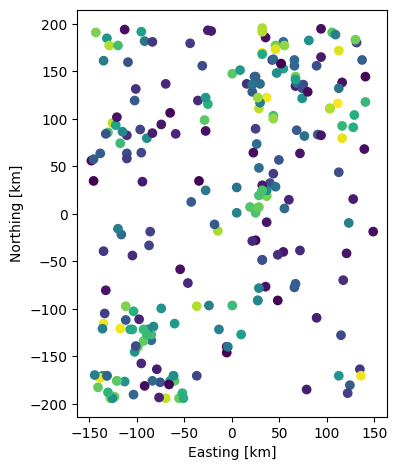

In [467]:
# The parameters in the associator class: n_picks=2,n_p_picks=1,n_s_picks=1,n_p_and_s_picks=1
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot()
ax.set_aspect("equal")

ax.scatter(events["x"], events["y"], c=events["z"])
ax.set_xlabel("Easting [km]")
ax.set_ylabel("Northing [km]")